In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [4]:
top_df = pd.read_csv("/Users/adriana/Google Drive/_Learning/_DS4A/Assignments/0_Final_Project/2020_top_thirty.csv")
poli_df = pd.read_csv("/Users/adriana/Google Drive/_Learning/_DS4A/Assignments/0_Final_Project/top_thirty_poli_df.csv")
hc_df = pd.read_csv("/Users/adriana/Google Drive/_Learning/_DS4A/Assignments/0_Final_Project/top_thirty_hc_df.csv")

In [5]:
top_df.head()

,region,city,state,popsize,pop_est,white_nonhi,black,asian,hisp_lat
0,northeast,New York City,New York,1M+,8336817,0.32,0.243,0.141,0.291
1,west,Los Angeles,California,1M+,3979576,0.29,0.089,0.116,0.485
2,midwest,Chicago,Illinois,1M+,2693976,0.33,0.296,0.066,0.288
3,southwest,Houston,Texas,1M+,2320268,0.24,0.226,0.068,0.450
4,west,Phoenix,Arizona,1M+,1680992,0.43,0.071,0.038,0.426


In [6]:
poli_df.head()

,region,city,state,popsize,pop_est,white_nonhi,black,asian,hisp_lat,mayor_party,gov_party,leg_maj
0,southwest,Albuquerque,New Mexico,"500k-999,999",560513,0.39,0.033,0.029,0.492,Democrat,Democrat,Democrat
1,southeast,Atlanta,Georgia,"500k-999,999",506811,0.38,0.510,0.044,0.043,Democrat,Republican,Democrat
2,southwest,Austin,Texas,"500k-999,999",978908,0.48,0.078,0.076,0.339,Democrat,Republican,Republican
3,northeast,Baltimore,Maryland,"500k-999,999",593490,0.28,0.624,0.026,0.053,Democrat,Republican,Democrat
4,northeast,Boston,Massachusetts,"500k-999,999",692600,0.45,0.252,0.097,0.198,Democrat,Republican,Democrat


In [7]:
hc_df.head()

,region,city,state,popsize,pop_est,white_nonhi,black,asian,hisp_lat,hc_demo
0,southwest,Albuquerque,New Mexico,"500k-999,999",560513,0.39,0.033,0.029,0.492,25.0
1,southeast,Atlanta,Georgia,"500k-999,999",506811,0.38,0.510,0.044,0.043,NaN
2,southwest,Austin,Texas,"500k-999,999",978908,0.48,0.078,0.076,0.339,5.0
3,northeast,Baltimore,Maryland,"500k-999,999",593490,0.28,0.624,0.026,0.053,NaN
4,northeast,Boston,Massachusetts,"500k-999,999",692600,0.45,0.252,0.097,0.198,113.0


# Merge & Clean 2019 Hate Crimes and 2018-2021 Political Parties (Congress, Governor, & Mayor)

In [8]:
# merge political and hate crime dfs to top_df

top_df = pd.merge(poli_df, hc_df, on = "city", how = "left")
top_df.head()

,region_x,city,state_x,popsize_x,pop_est_x,white_nonhi_x,black_x,asian_x,hisp_lat_x,mayor_party,...,leg_maj,region_y,state_y,popsize_y,pop_est_y,white_nonhi_y,black_y,asian_y,hisp_lat_y,hc_demo
0,southwest,Albuquerque,New Mexico,"500k-999,999",560513,0.39,0.033,0.029,0.492,Democrat,...,Democrat,southwest,New Mexico,"500k-999,999",560513,0.39,0.033,0.029,0.492,25.0
1,southeast,Atlanta,Georgia,"500k-999,999",506811,0.38,0.510,0.044,0.043,Democrat,...,Democrat,southeast,Georgia,"500k-999,999",506811,0.38,0.510,0.044,0.043,NaN
2,southwest,Austin,Texas,"500k-999,999",978908,0.48,0.078,0.076,0.339,Democrat,...,Republican,southwest,Texas,"500k-999,999",978908,0.48,0.078,0.076,0.339,5.0
3,northeast,Baltimore,Maryland,"500k-999,999",593490,0.28,0.624,0.026,0.053,Democrat,...,Democrat,northeast,Maryland,"500k-999,999",593490,0.28,0.624,0.026,0.053,NaN
4,northeast,Boston,Massachusetts,"500k-999,999",692600,0.45,0.252,0.097,0.198,Democrat,...,Democrat,northeast,Massachusetts,"500k-999,999",692600,0.45,0.252,0.097,0.198,113.0


In [9]:
top_df.columns

Index(['region_x', 'city', 'state_x', 'popsize_x', 'pop_est_x',
       'white_nonhi_x', 'black_x', 'asian_x', 'hisp_lat_x', 'mayor_party',
       'gov_party', 'leg_maj', 'region_y', 'state_y', 'popsize_y', 'pop_est_y',
       'white_nonhi_y', 'black_y', 'asian_y', 'hisp_lat_y', 'hc_demo'],
      dtype='object')

In [10]:
# clean columns for top_df

top_df = top_df[['region_x', 'city', 'state_x', 'popsize_x', 'pop_est_x', 'white_nonhi_x',
       'black_x', 'asian_x', 'hisp_lat_x', 'mayor_party', 'gov_party','leg_maj','hc_demo']]
top_df.columns = ['region', 'city', 'state', 'popsize', 'pop_est', 'white_nonhi',
       'black', 'asian', 'hisp_lat', 'mayor_party', 'gov_party', 'cong_maj','hc_demo']
top_df.head()

,region,city,state,popsize,pop_est,white_nonhi,black,asian,hisp_lat,mayor_party,gov_party,cong_maj,hc_demo
0,southwest,Albuquerque,New Mexico,"500k-999,999",560513,0.39,0.033,0.029,0.492,Democrat,Democrat,Democrat,25.0
1,southeast,Atlanta,Georgia,"500k-999,999",506811,0.38,0.510,0.044,0.043,Democrat,Republican,Democrat,NaN
2,southwest,Austin,Texas,"500k-999,999",978908,0.48,0.078,0.076,0.339,Democrat,Republican,Republican,5.0
3,northeast,Baltimore,Maryland,"500k-999,999",593490,0.28,0.624,0.026,0.053,Democrat,Republican,Democrat,NaN
4,northeast,Boston,Massachusetts,"500k-999,999",692600,0.45,0.252,0.097,0.198,Democrat,Republican,Democrat,113.0


In [11]:
# sort top_df by population size estimate

top_df = top_df.sort_values(by=['pop_est'], ascending = False)
top_df.head()

,region,city,state,popsize,pop_est,white_nonhi,black,asian,hisp_lat,mayor_party,gov_party,cong_maj,hc_demo
26,northeast,New York City,New York,1M+,8336817,0.32,0.243,0.141,0.291,Democrat,Democrat,Democrat,90.0
20,west,Los Angeles,California,1M+,3979576,0.29,0.089,0.116,0.485,Democrat,Democrat,Democrat,118.0
6,midwest,Chicago,Illinois,1M+,2693976,0.33,0.296,0.066,0.288,Democrat,Democrat,Democrat,18.0
15,southwest,Houston,Texas,1M+,2320268,0.24,0.226,0.068,0.450,Democrat,Republican,Republican,13.0
30,west,Phoenix,Arizona,1M+,1680992,0.43,0.071,0.038,0.426,Democrat,Republican,Democrat,111.0


In [12]:
# Create new columns for total population size estimate of black + asian + hisp/lat; 
# and columns for each demographic's population size estimate

top_df["minor_pop_est"] = (top_df["black"] + top_df["asian"] + top_df["hisp_lat"]) * top_df["pop_est"]
top_df["white_pop_est"] = top_df["white_nonhi"] * top_df["pop_est"]
top_df["black_pop_est"] = top_df["black"] * top_df["pop_est"]
top_df["asian_pop_est"] = top_df["asian"] * top_df["pop_est"]
top_df["hisp_lat_pop_est"] = top_df["hisp_lat"] * top_df["pop_est"]
top_df.head()

,region,city,state,popsize,pop_est,white_nonhi,black,asian,hisp_lat,mayor_party,gov_party,cong_maj,hc_demo,minor_pop_est,white_pop_est,black_pop_est,asian_pop_est,hisp_lat_pop_est
26,northeast,New York City,New York,1M+,8336817,0.32,0.243,0.141,0.291,Democrat,Democrat,Democrat,90.0,5627351.475,2667781.44,2025846.531,1175491.197,2426013.747
20,west,Los Angeles,California,1M+,3979576,0.29,0.089,0.116,0.485,Democrat,Democrat,Democrat,118.0,2745907.440,1154077.04,354182.264,461630.816,1930094.360
6,midwest,Chicago,Illinois,1M+,2693976,0.33,0.296,0.066,0.288,Democrat,Democrat,Democrat,18.0,1751084.400,889012.08,797416.896,177802.416,775865.088
15,southwest,Houston,Texas,1M+,2320268,0.24,0.226,0.068,0.450,Democrat,Republican,Republican,13.0,1726279.392,556864.32,524380.568,157778.224,1044120.600
30,west,Phoenix,Arizona,1M+,1680992,0.43,0.071,0.038,0.426,Democrat,Republican,Democrat,111.0,899330.720,722826.56,119350.432,63877.696,716102.592


In [13]:
# save master df for resiliency

top_df.to_csv("/Users/adriana/Google Drive/_Learning/_DS4A/Assignments/0_Final_Project/2020_top_thirty_final.csv", index = False)

# Population and Minority Demos

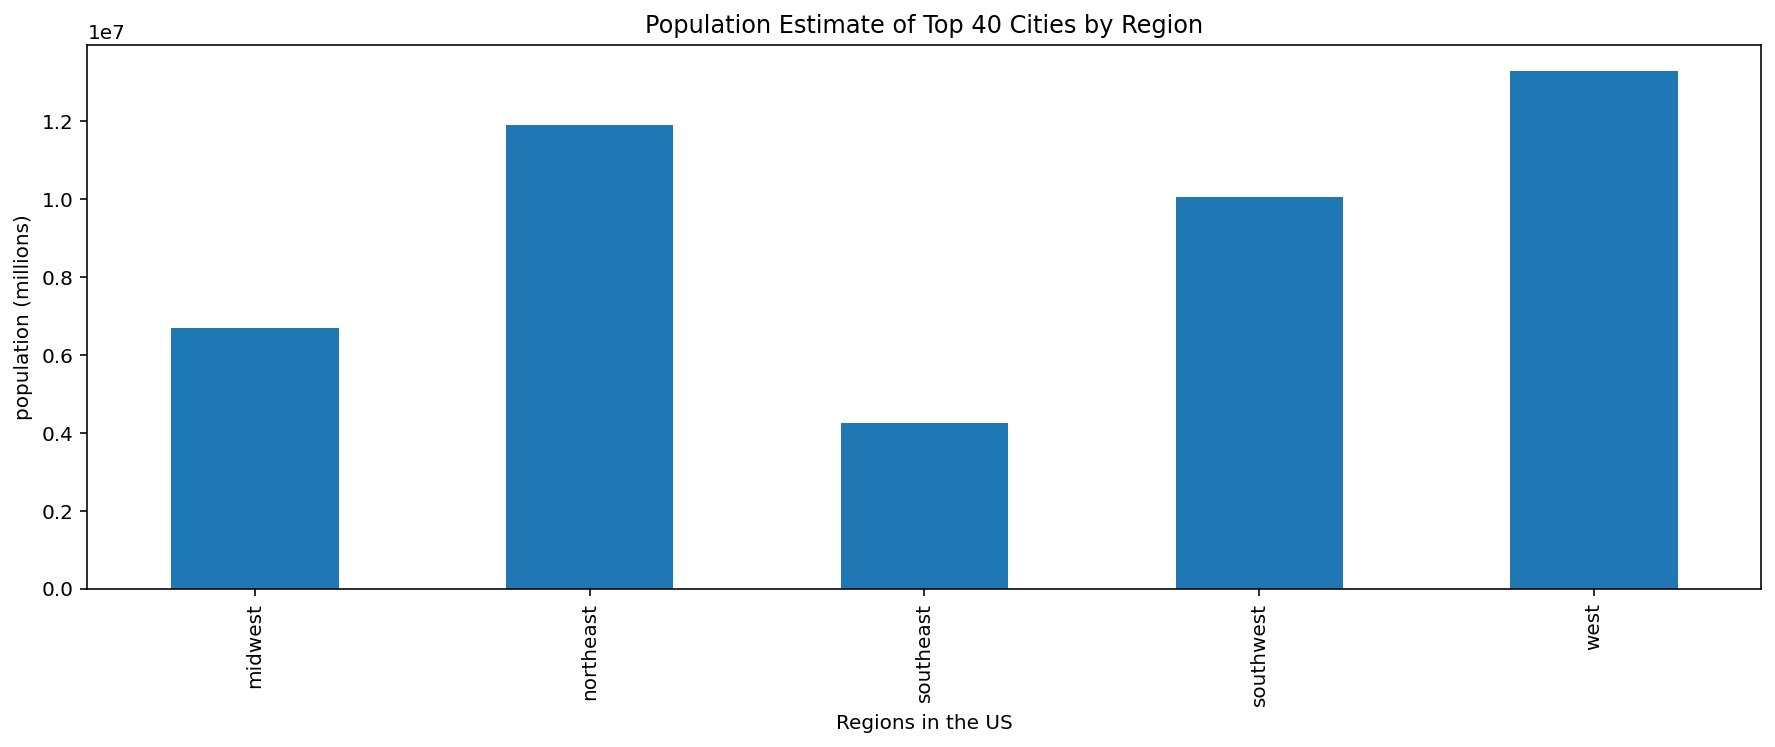

In [14]:
# Population Estimate of Top 40 Cities by Region

pop_region_plot = top_df.groupby("region")["pop_est"].sum()
pop_region_plot.plot.bar(figsize = (15,5))
plt.xlabel("Regions in the US")
plt.ylabel("population (millions)")
plt.title("Population Estimate of Top 40 Cities by Region");

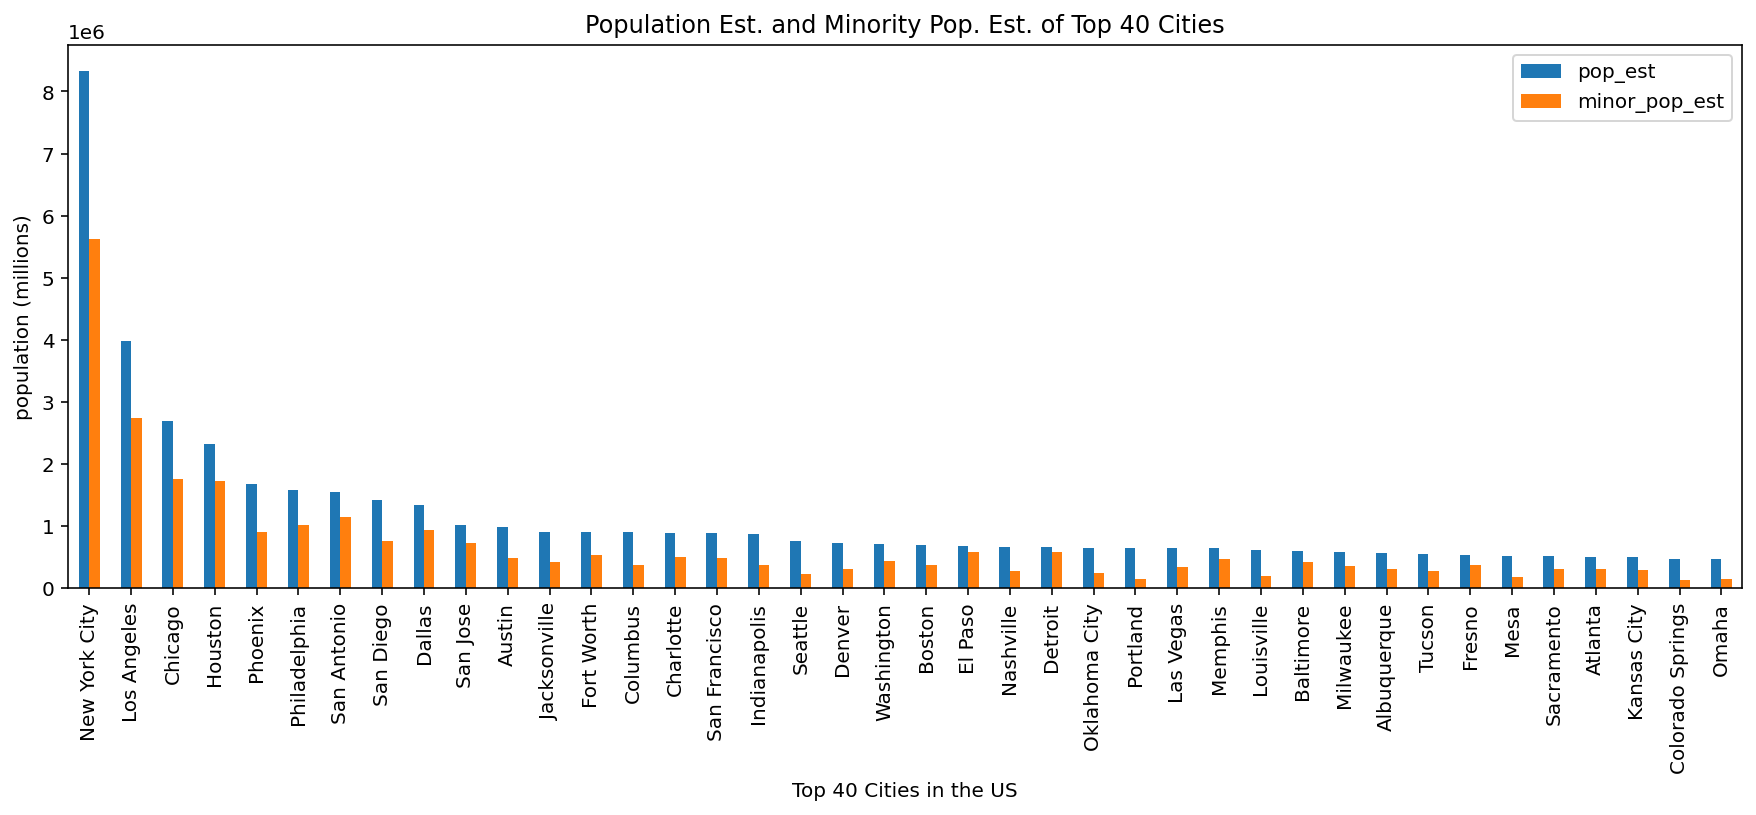

In [15]:
# Population Est. and Minority Pop. Est. of Top 40 Cities

pop_city_plot = top_df[["city", "pop_est", "minor_pop_est"]].sort_values(by=['pop_est'], ascending = False)
pop_city_plot.plot.bar(x = "city", figsize = (15,5))
plt.xlabel("Top 40 Cities in the US")
plt.ylabel("population (millions)")
plt.title("Population Est. and Minority Pop. Est. of Top 40 Cities");

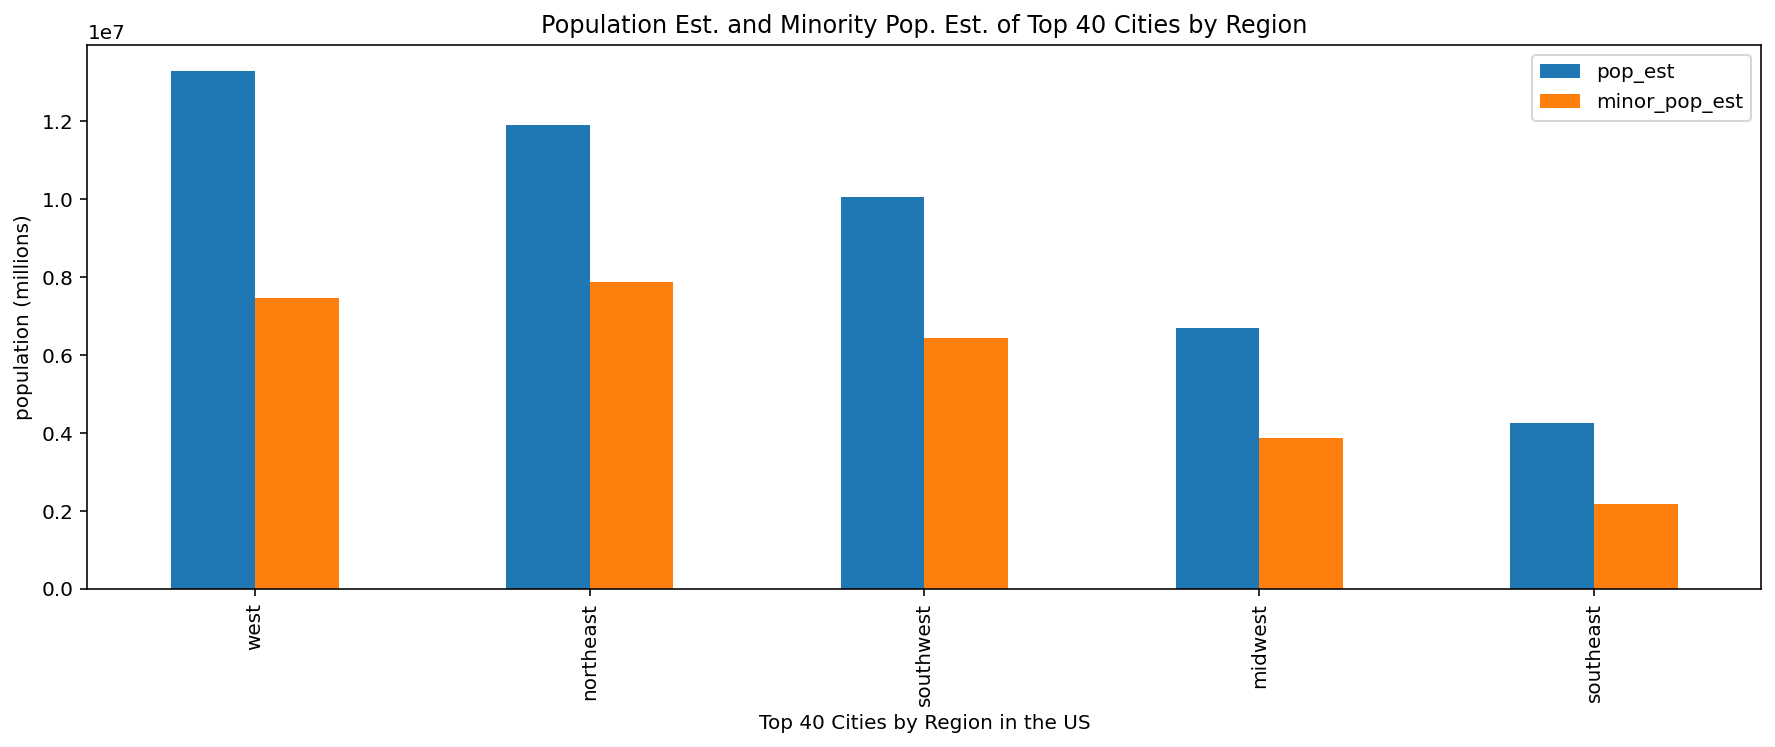

In [16]:
# Population Est. and Minority Pop. Est. of Top 40 Cities by Region

pop_region_plot = top_df.groupby("region")[["pop_est", "minor_pop_est"]].sum().sort_values(by=['pop_est'], ascending = False)
pop_region_plot.plot.bar(figsize = (15,5))
plt.xlabel("Top 40 Cities by Region in the US")
plt.ylabel("population (millions)")
plt.title("Population Est. and Minority Pop. Est. of Top 40 Cities by Region");

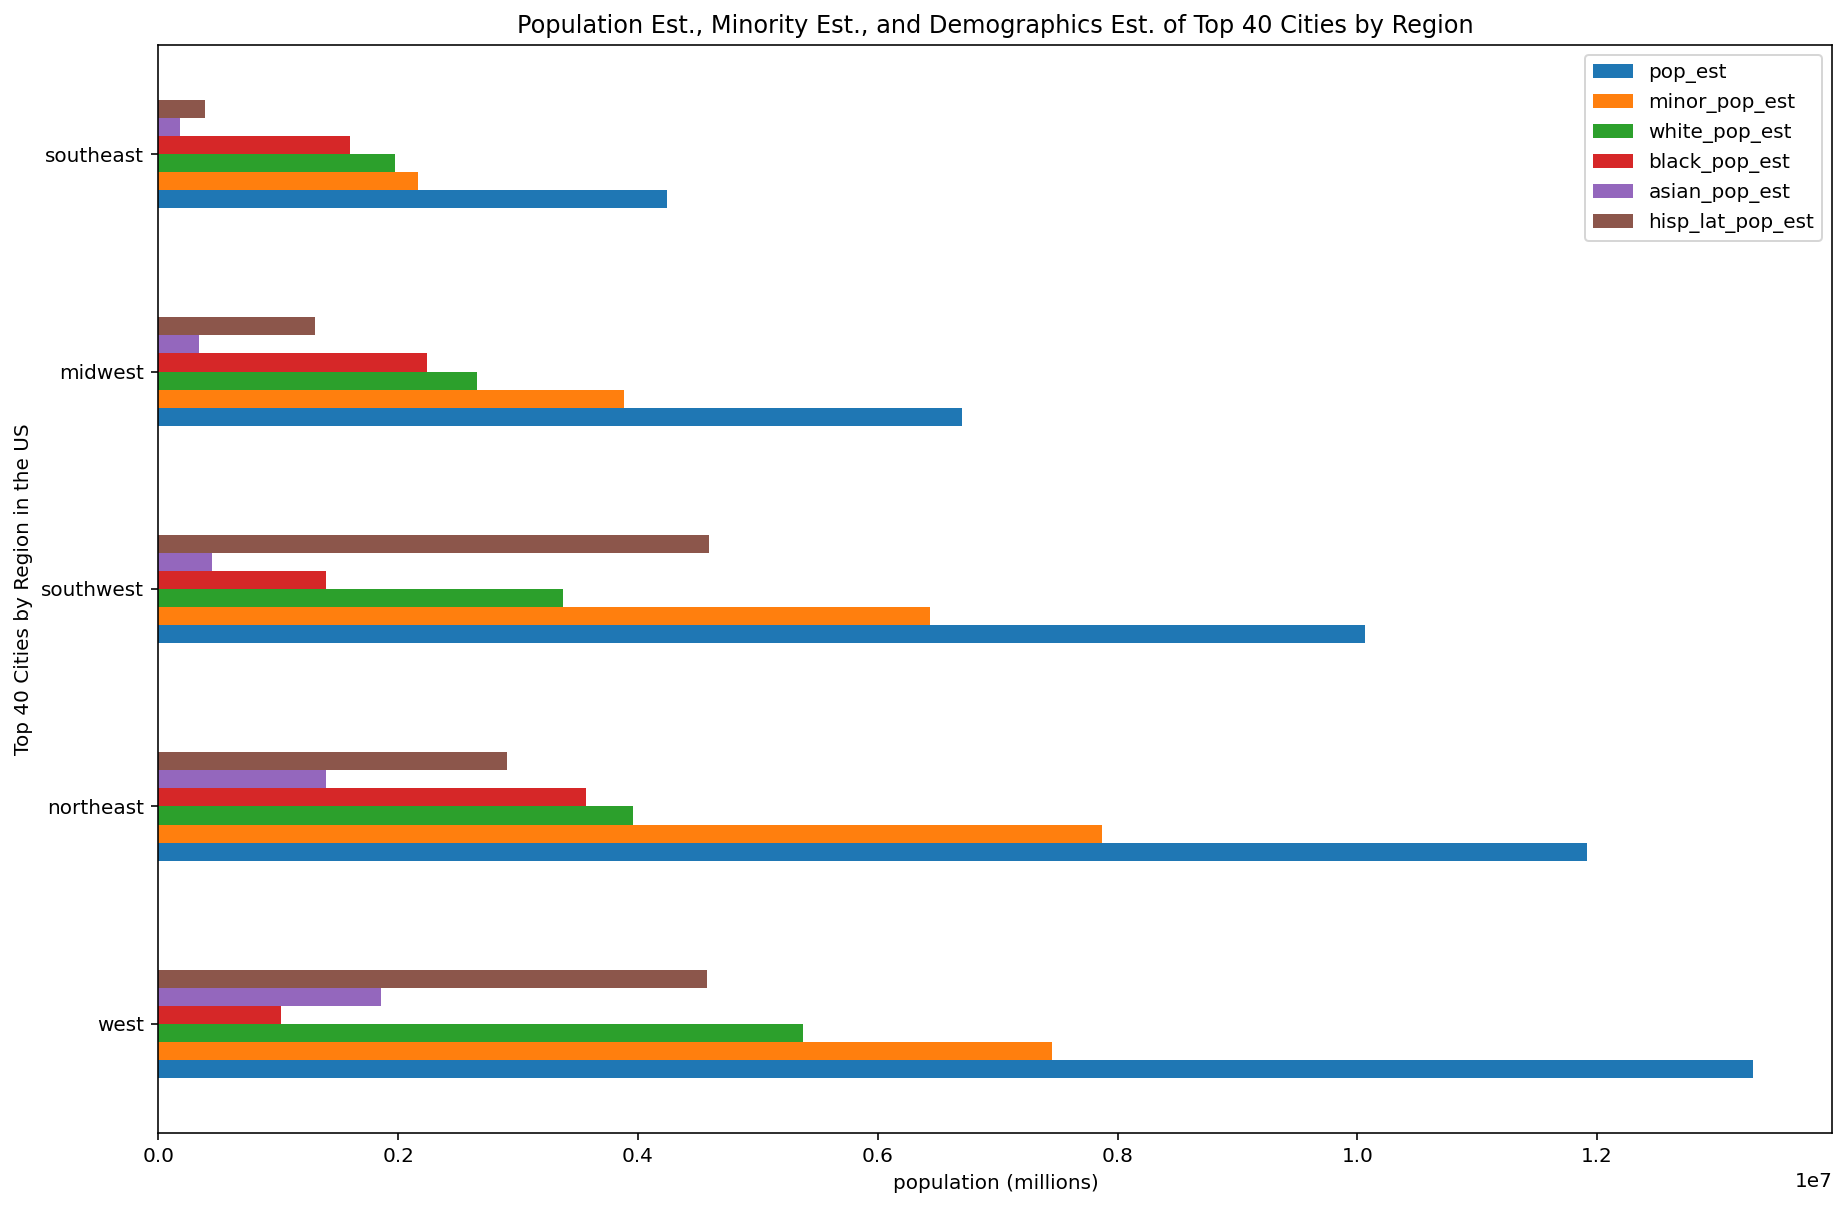

In [17]:
# Population Est., Minority Est., and Demographics Est. of Top 40 Cities by Region

pop_demo_plot = top_df.groupby("region")[["pop_est", "minor_pop_est", "white_pop_est","black_pop_est","asian_pop_est", "hisp_lat_pop_est"]].sum().sort_values(by=['pop_est'], ascending = False)
pop_demo_plot.plot.barh(figsize = (15,10))
plt.xlabel("population (millions)")
plt.ylabel("Top 40 Cities by Region in the US")
plt.title("Population Est., Minority Est., and Demographics Est. of Top 40 Cities by Region");

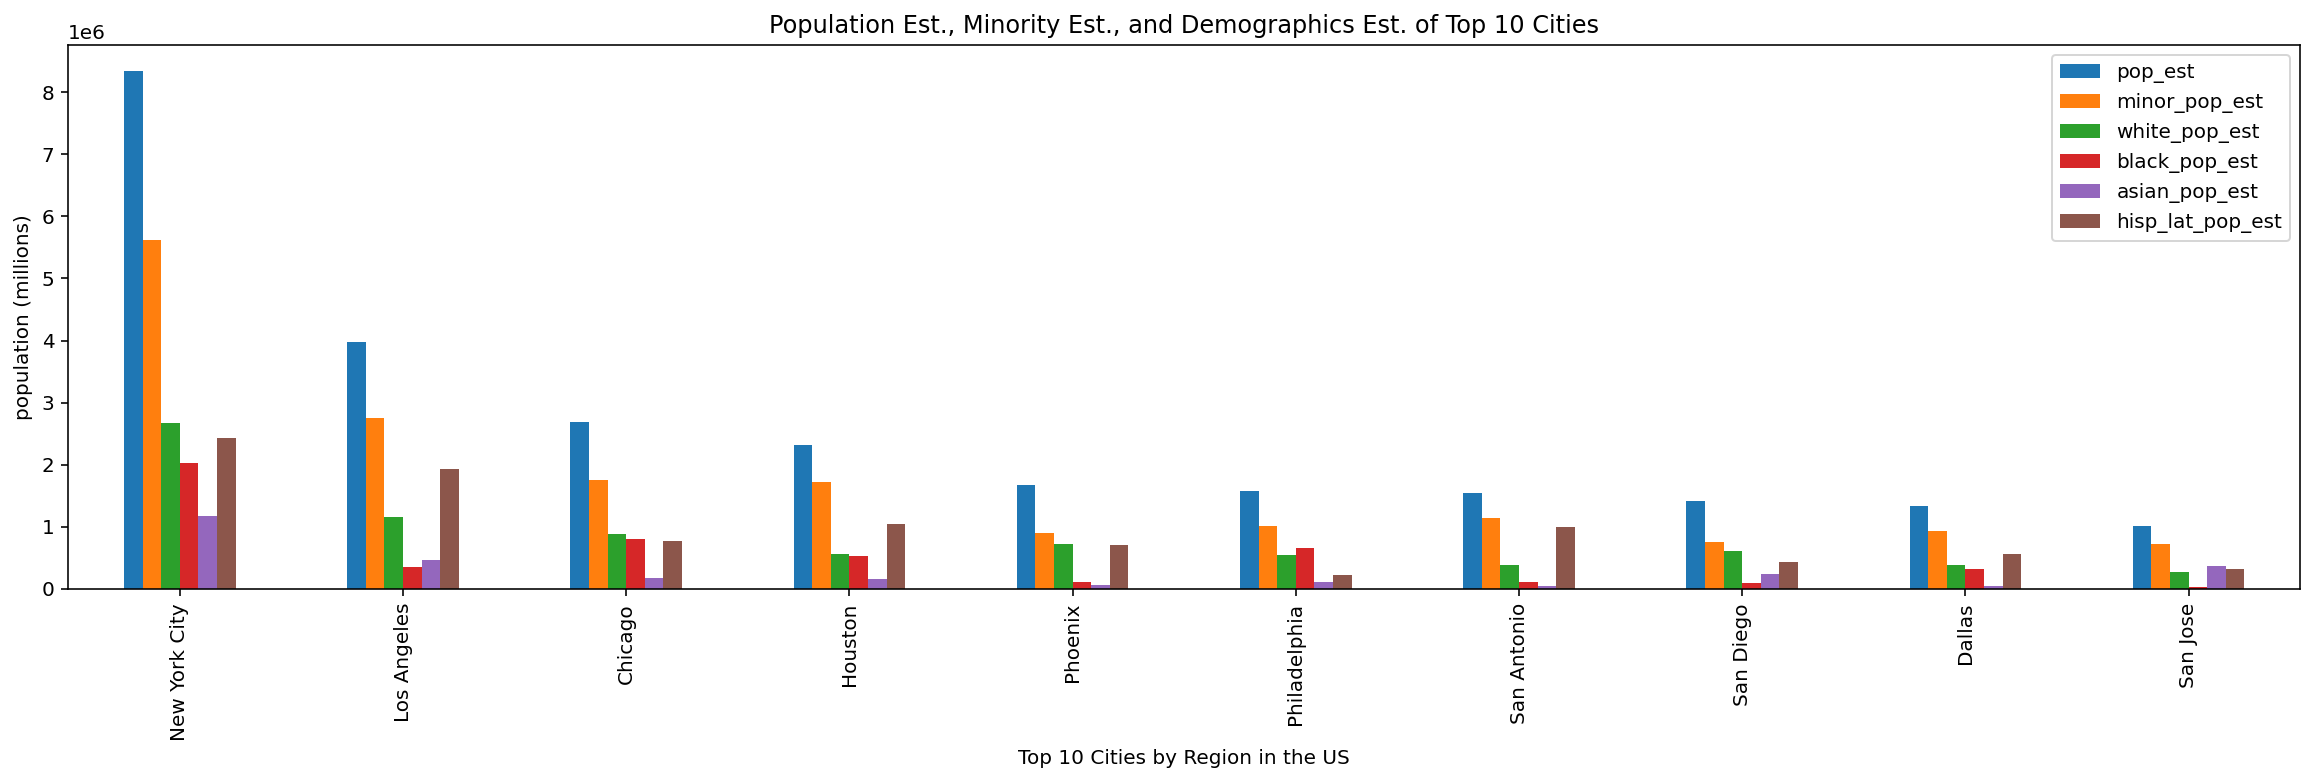

In [18]:
# Population Est., Minority Est., and Demographics Est. of Top 10 Cities

pop_demo_plot = top_df.groupby("city")[["pop_est", "minor_pop_est", "white_pop_est","black_pop_est","asian_pop_est", "hisp_lat_pop_est"]].sum().sort_values(by=['pop_est'], ascending = False).head(10)
pop_demo_plot.plot.bar(figsize = (20,5))
plt.xlabel("Top 10 Cities by Region in the US")
plt.ylabel("population (millions)")
plt.title("Population Est., Minority Est., and Demographics Est. of Top 10 Cities");

In [19]:
# Create new features for each total minorities 
# and each demographic's percentage of the total population, for each city

top_df["minor_pop_ratio"] = top_df["minor_pop_est"]/top_df["pop_est"]
top_df["white_pop_ratio"] = top_df["white_pop_est"]/top_df["pop_est"]
top_df["black_pop_ratio"] = top_df["black_pop_est"]/top_df["pop_est"]
top_df["asian_pop_ratio"] = top_df["asian_pop_est"]/top_df["pop_est"]
top_df["hisp_lat_pop_ratio"] = top_df["hisp_lat_pop_est"]/top_df["pop_est"]

In [20]:
# save master df for resiliency

top_df.to_csv("/Users/adriana/Google Drive/_Learning/_DS4A/Assignments/0_Final_Project/2020_top_thirty_final.csv", index = False)

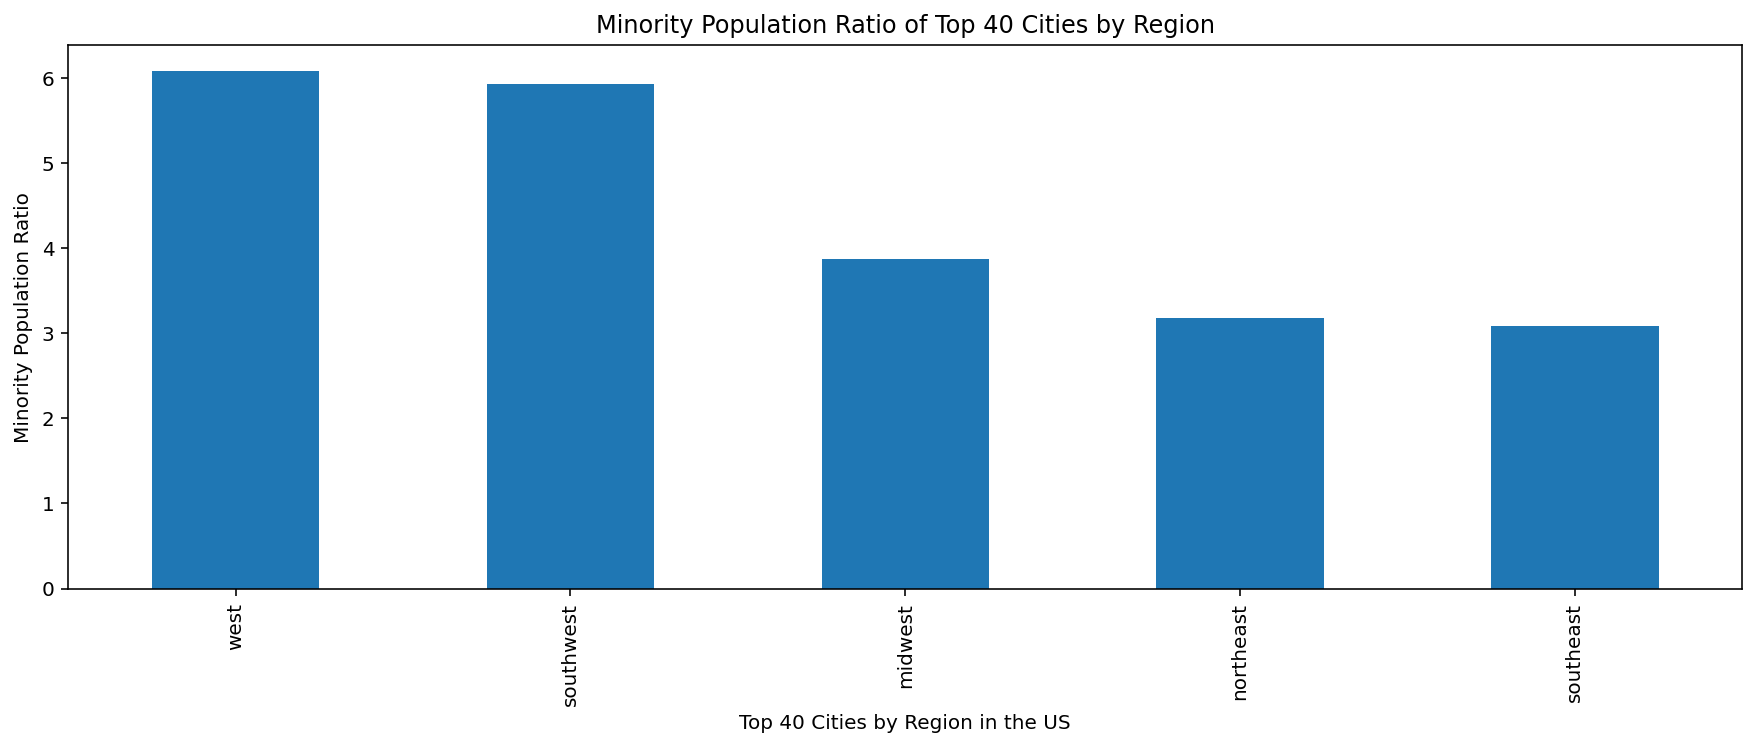

In [21]:
# Minority Population Ratio of Top 40 Cities by Region

ratio_region_plot = top_df.groupby("region")["minor_pop_ratio"].sum().sort_values(ascending = False)
ratio_region_plot.plot.bar(figsize = (15,5))
plt.xlabel("Top 40 Cities by Region in the US")
plt.ylabel("Minority Population Ratio")
plt.title("Minority Population Ratio of Top 40 Cities by Region");

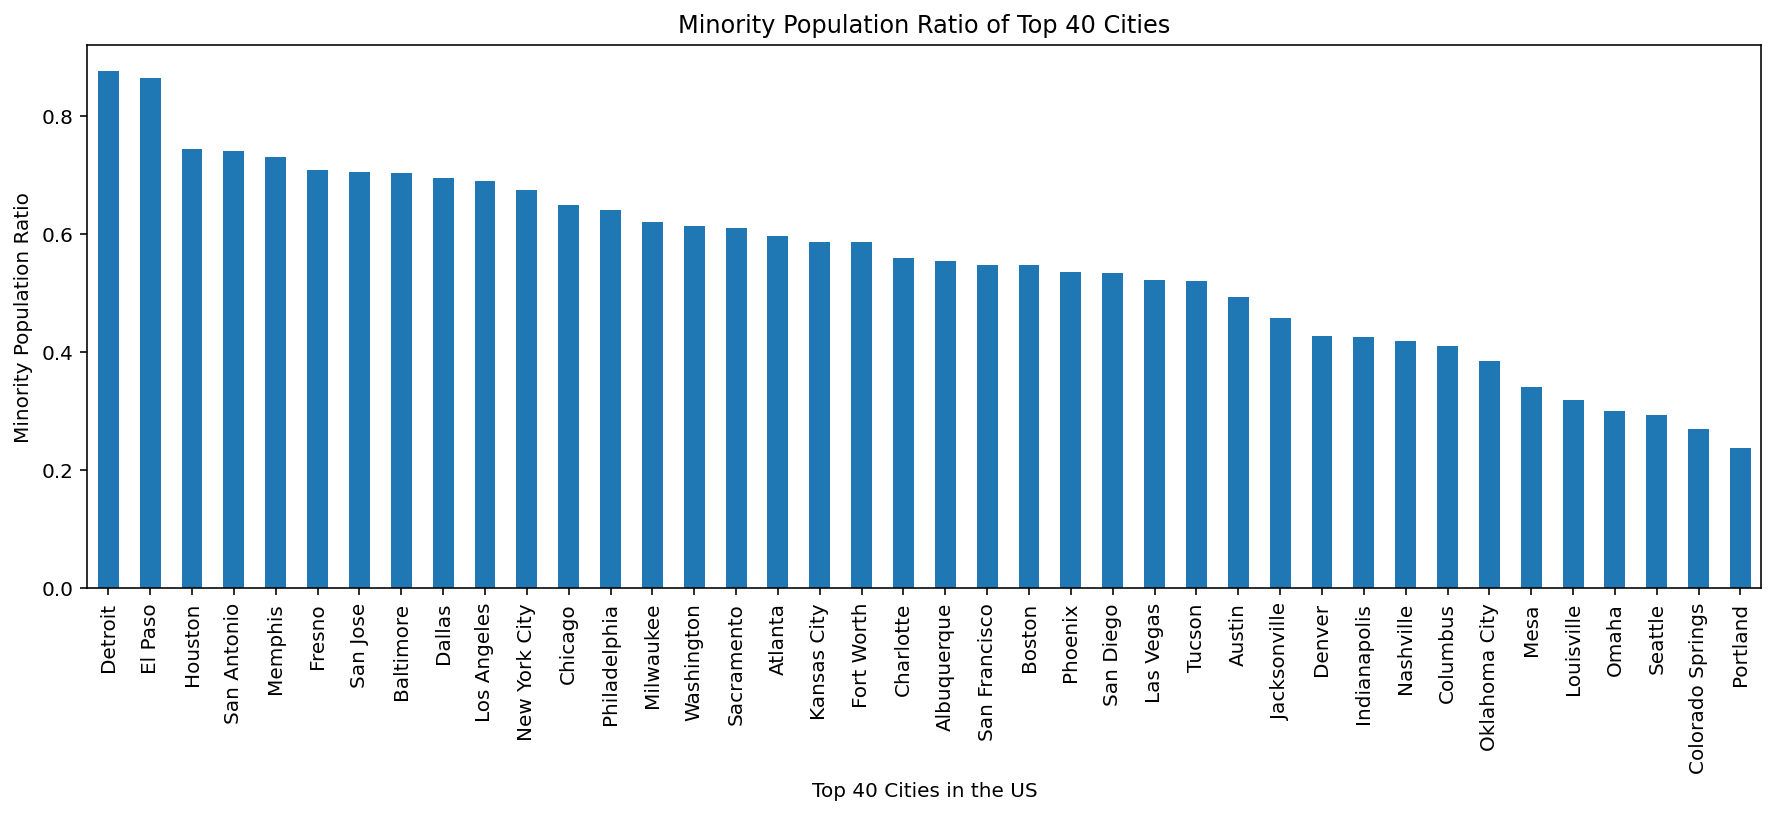

In [22]:
# Minority Population Ratio of Top 40 Cities

ratio_city_plot = top_df.groupby("city")["minor_pop_ratio"].sum().sort_values(ascending = False)
ratio_city_plot.plot.bar(figsize = (15,5))
plt.xlabel("Top 40 Cities in the US")
plt.ylabel("Minority Population Ratio")
plt.title("Minority Population Ratio of Top 40 Cities");

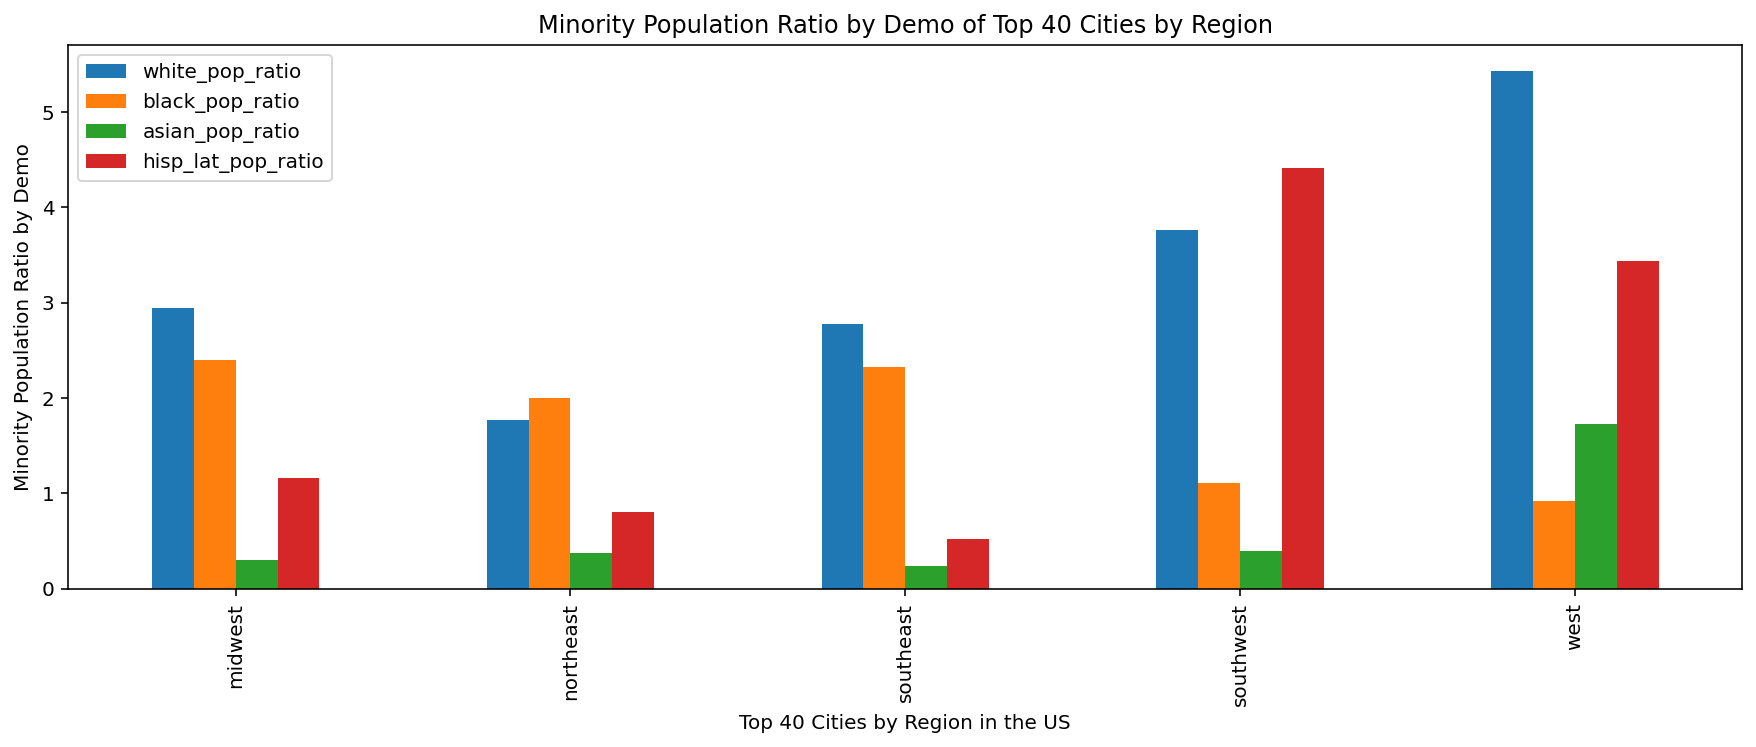

In [23]:
# Minority Population Ratio by Demo of Top 40 Cities by Region

dem_ratio_region_plot = top_df.groupby("region")[["white_pop_ratio", "black_pop_ratio", "asian_pop_ratio", "hisp_lat_pop_ratio"]].sum()
dem_ratio_region_plot.plot.bar(figsize = (15,5))
plt.xlabel("Top 40 Cities by Region in the US")
plt.ylabel("Minority Population Ratio by Demo")
plt.title("Minority Population Ratio by Demo of Top 40 Cities by Region");

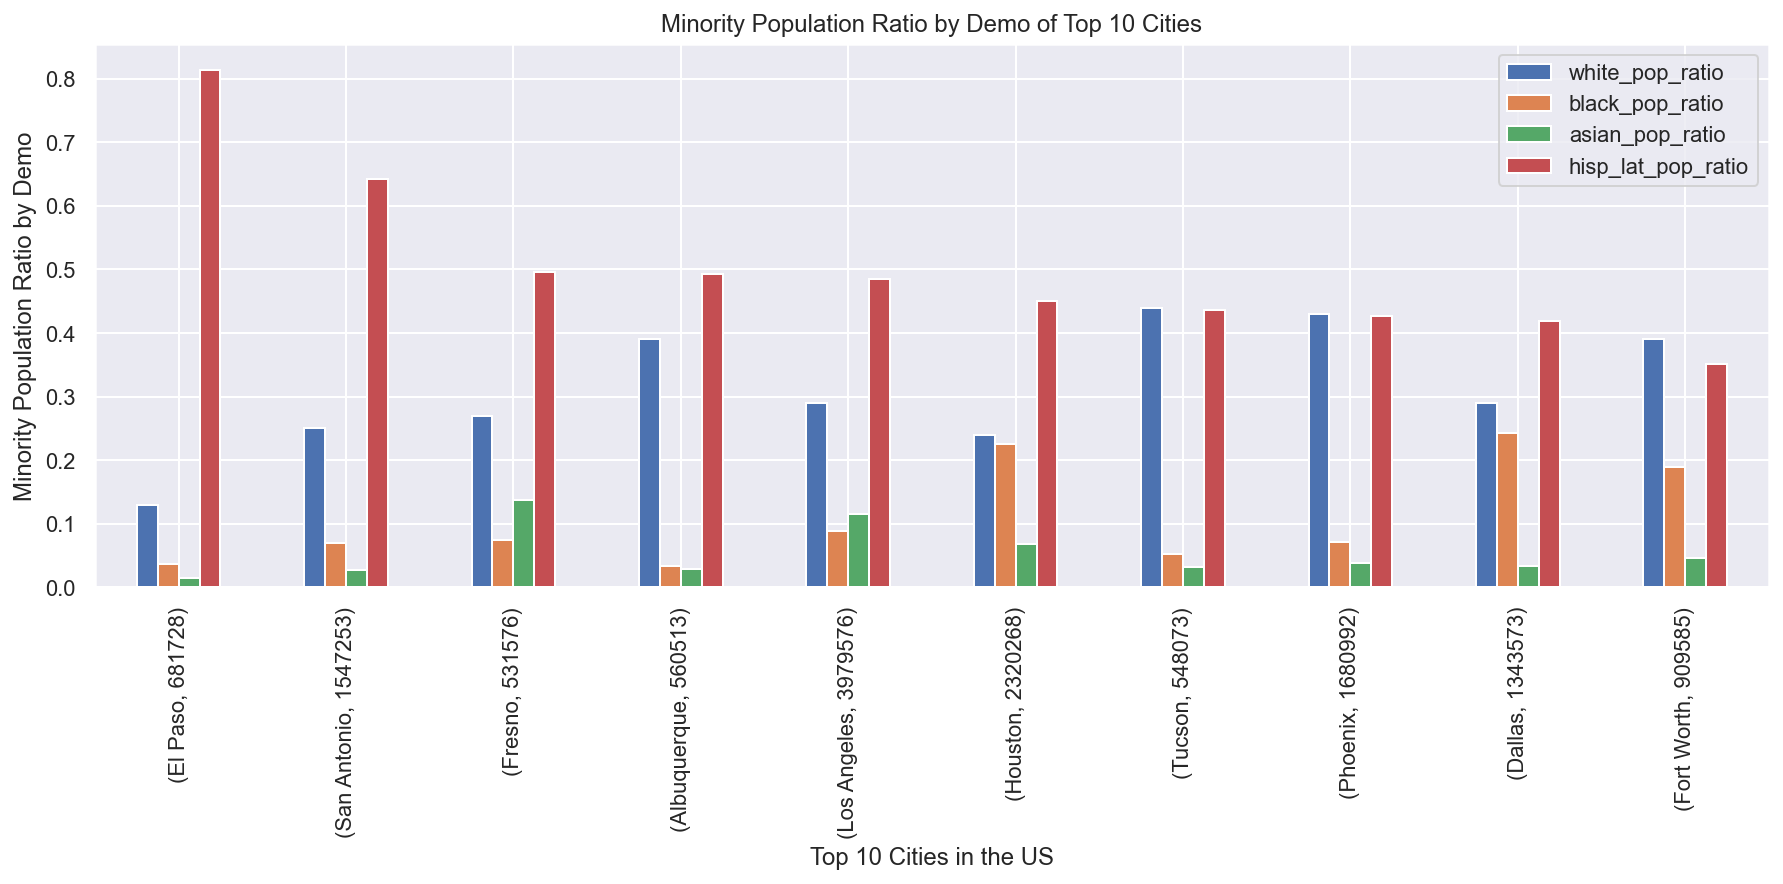

In [44]:
# Minority Population Ratio by Demo of Top 10 Cities

dem_ratio_city_plot = top_df.groupby(["city","pop_est"])[["white_pop_ratio", "black_pop_ratio", "asian_pop_ratio", "hisp_lat_pop_ratio"]].sum().sort_values(by = "hisp_lat_pop_ratio", ascending = False).head(10)
dem_ratio_city_plot.plot.bar(figsize = (15,5))
plt.xlabel("Top 10 Cities in the US")
plt.ylabel("Minority Population Ratio by Demo")
plt.title("Minority Population Ratio by Demo of Top 10 Cities");

# Hate Crime

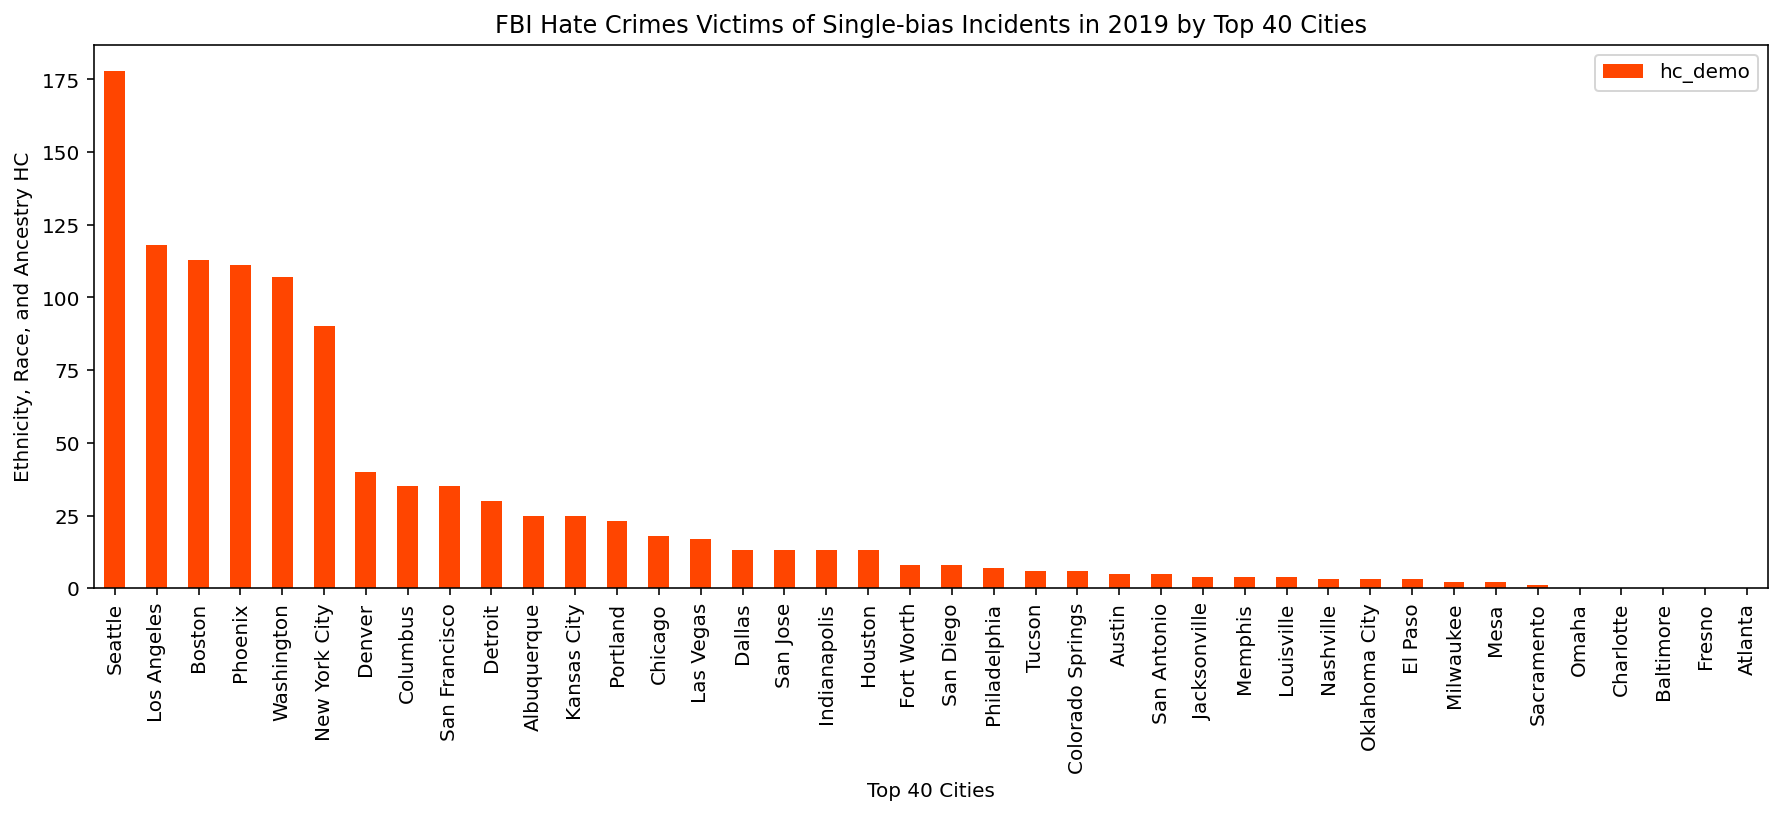

In [25]:
# FBI Hate Crimes Victims of Single-bias Incidents in 2019 by Top 40 Cities

hc_plot = top_df[["city", "hc_demo"]].sort_values(by = "hc_demo", ascending = False)
hc_plot.plot.bar(x = "city", y = "hc_demo", color = "orangered", figsize = (15,5))
plt.xlabel("Top 40 Cities")
plt.ylabel("Ethnicity, Race, and Ancestry HC")
plt.title("FBI Hate Crimes Victims of Single-bias Incidents in 2019 by Top 40 Cities");

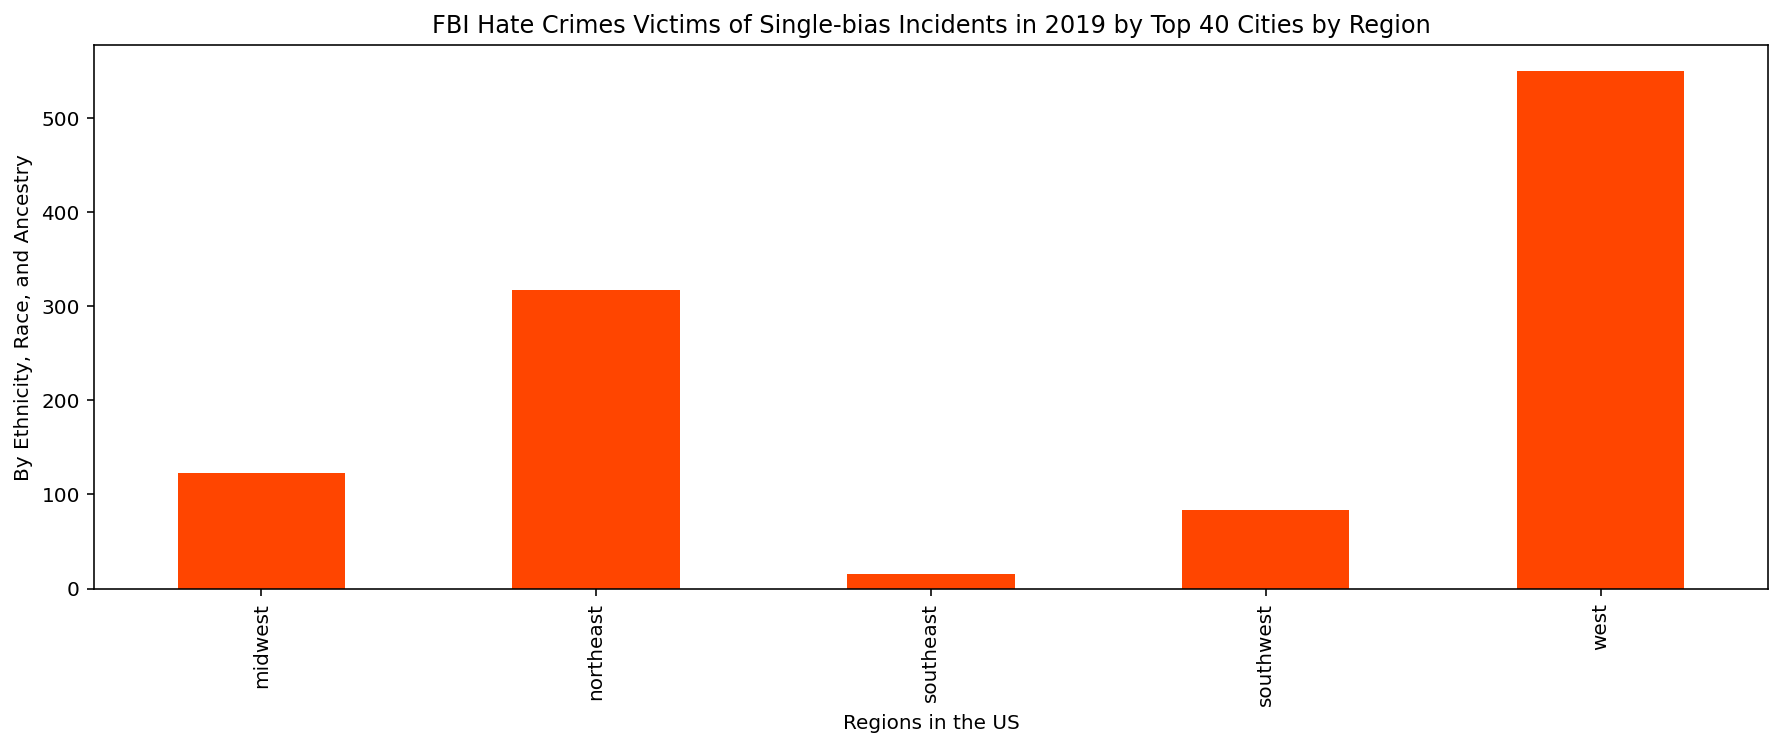

In [26]:
# FBI Hate Crimes Victims of Single-bias Incidents in 2019 by Top 40 Cities by Region

hc_region_plot = top_df.groupby("region")["hc_demo"].sum()
hc_region_plot.plot.bar(color = "orangered", figsize = (15,5))
plt.xlabel("Regions in the US")
plt.ylabel("By Ethnicity, Race, and Ancestry")
plt.title("FBI Hate Crimes Victims of Single-bias Incidents in 2019 by Top 40 Cities by Region");

# Hate Crime and Population Correlations

In [27]:
# Correlation of total minority population percentage to count of victims of hate crimes (race, ethnicity, ancestry)

minor_hc_corr = top_df[["minor_pop_ratio", "hc_demo"]].corr()
minor_hc_corr

,minor_pop_ratio,hc_demo
minor_pop_ratio,1.000000,-0.028896
hc_demo,-0.028896,1.000000


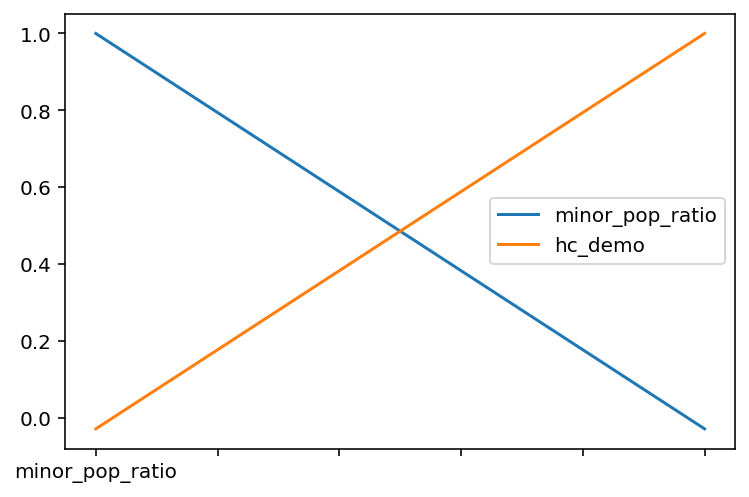

In [28]:
minor_hc_corr.plot.line();

In [29]:
# crosstab of hate crimes from each city, by region

hc_norm = pd.crosstab(index=hc_df["hc_demo"], columns=hc_df["region"], normalize="index")*100
hc_norm.head()

region,midwest,northeast,southeast,southwest,west
hc_demo,,,,,
0.0,100.0,0.0,0.000000,0.000000,0.0
1.0,0.0,0.0,0.000000,0.000000,100.0
2.0,50.0,0.0,0.000000,50.000000,0.0
3.0,0.0,0.0,33.333333,66.666667,0.0
4.0,0.0,0.0,100.000000,0.000000,0.0


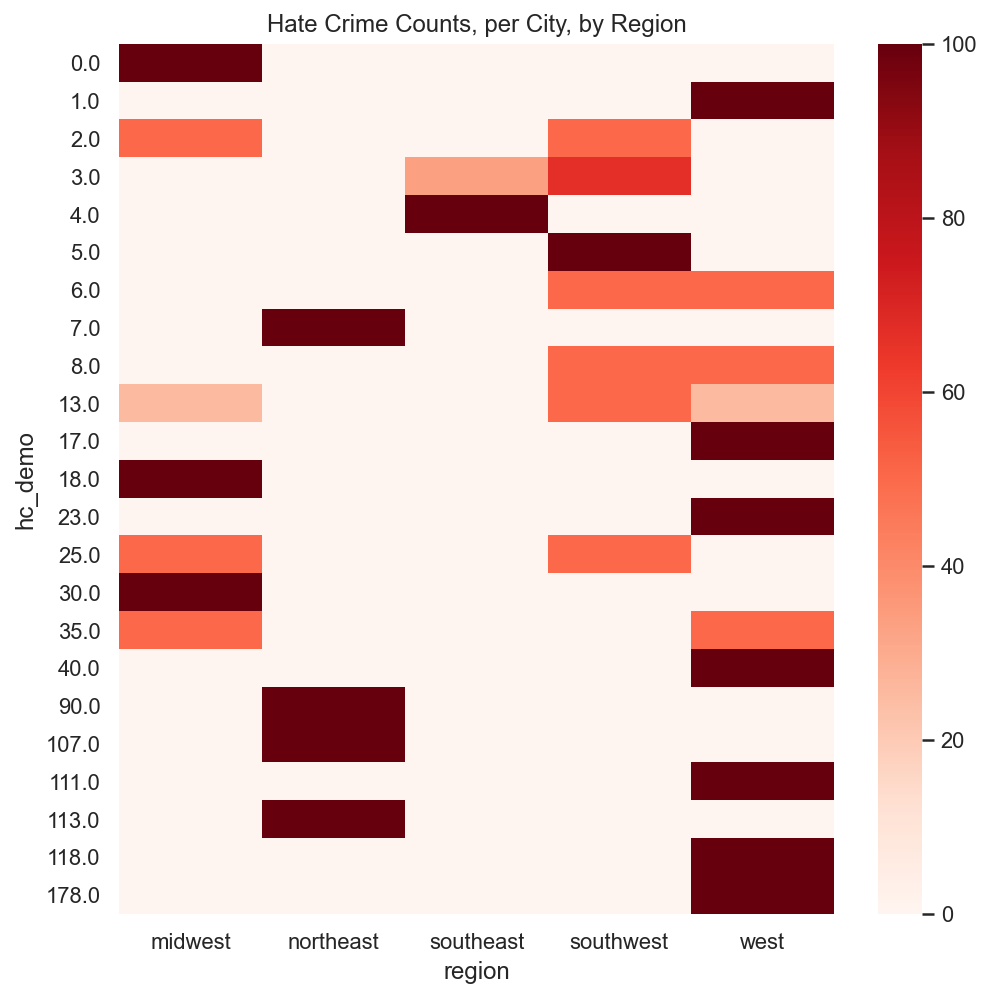

In [30]:
# heatmap of crosstab

sns.set(rc = {'figure.figsize':(8, 8)})
ax = sns.heatmap(hc_norm, cmap = "Reds")
ax.set_title("Hate Crime Counts, per City, by Region");

# Mayor Political Party

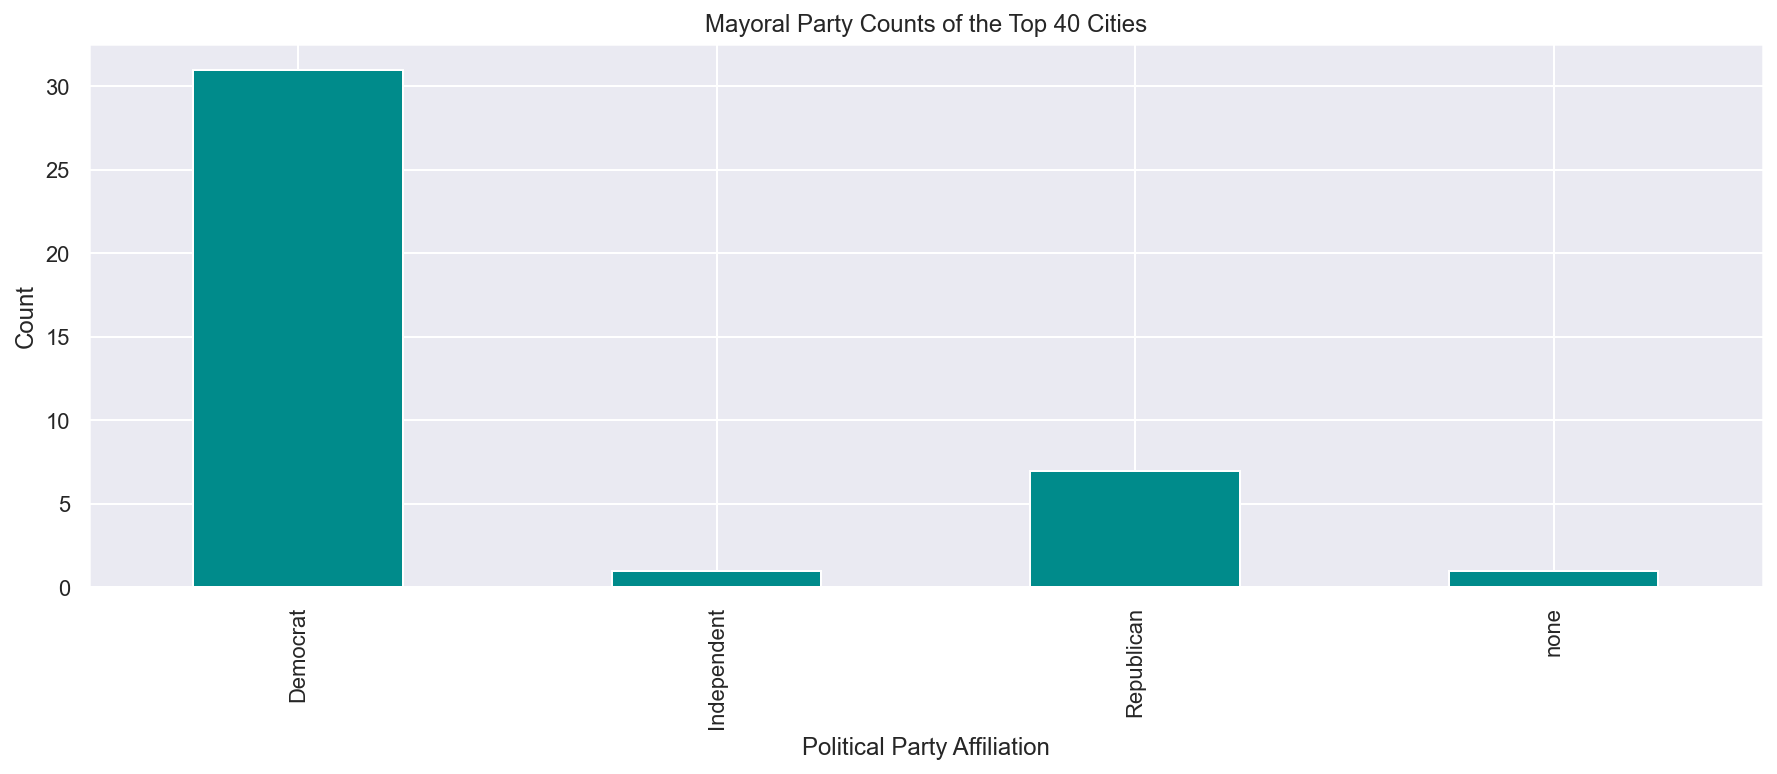

In [31]:
# Mayoral Party Counts of the Top 40 Cities

mayor_plot = top_df.groupby("mayor_party")["city"].count()
mayor_plot.plot.bar(color = "darkcyan", figsize = (15,5))
plt.xlabel("Political Party Affiliation")
plt.ylabel("Count")
plt.title("Mayoral Party Counts of the Top 40 Cities");

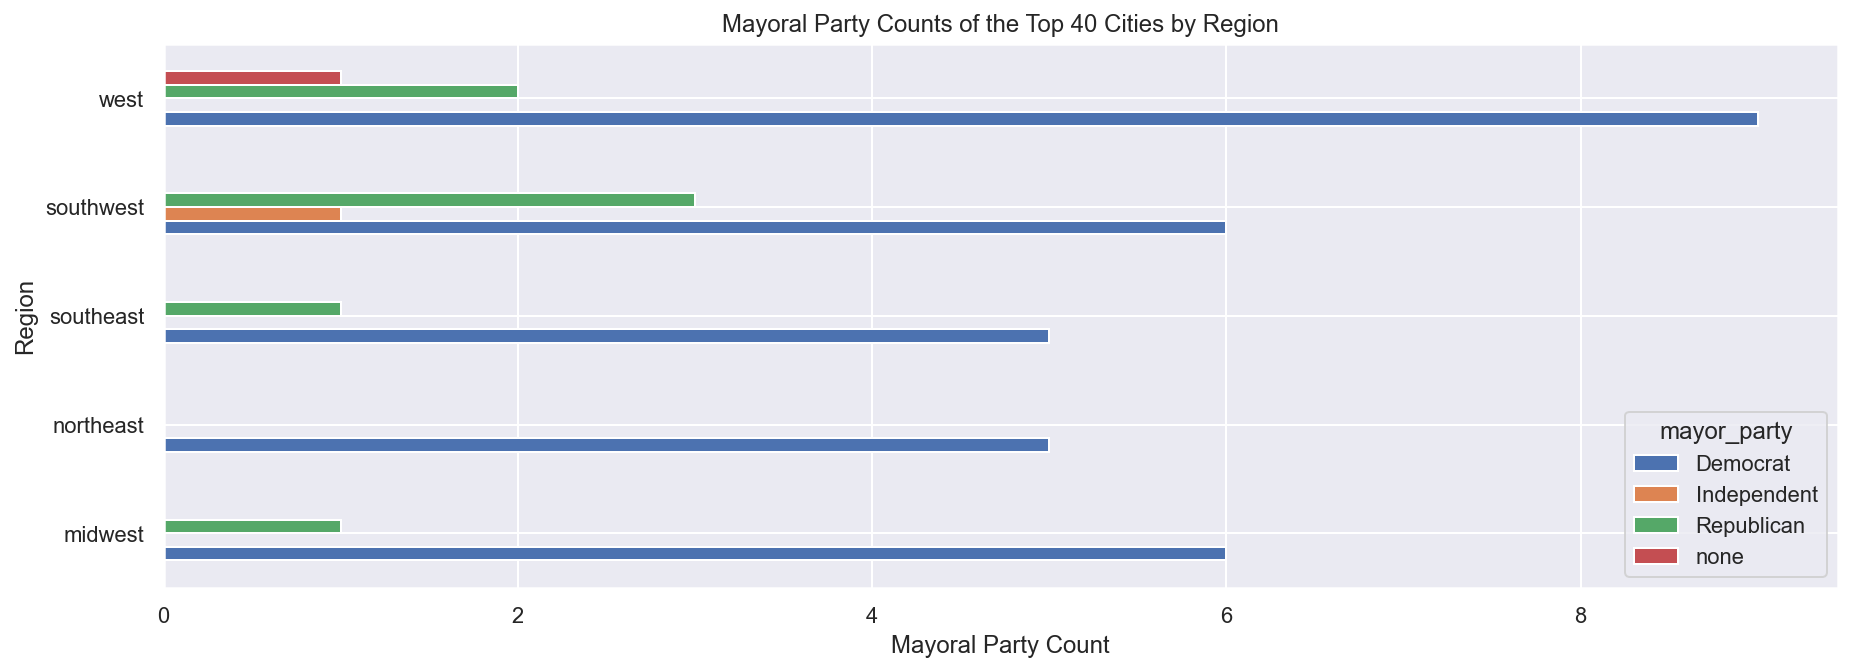

In [32]:
# Mayoral Party Counts of the Top 40 Cities by Region

mayor_region_plot = top_df.groupby("region")["mayor_party"].value_counts().unstack()
mayor_region_plot.plot.barh(figsize = (15,5))
plt.xlabel("Mayoral Party Count")
plt.ylabel("Region")
plt.title("Mayoral Party Counts of the Top 40 Cities by Region");

# Governor Political Party

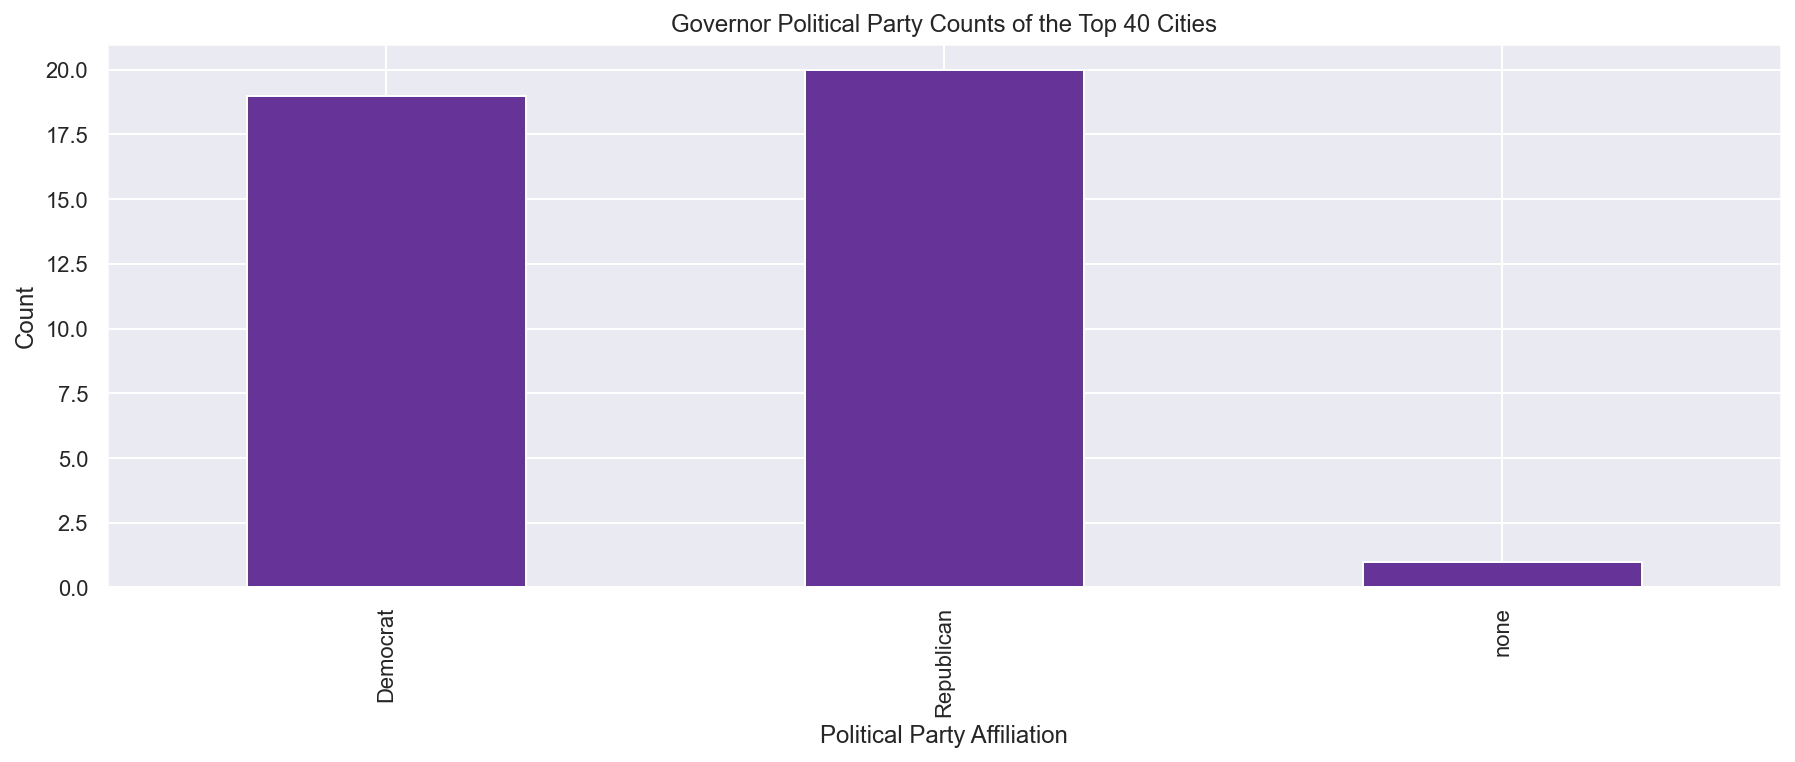

In [33]:
# Governor Political Party Counts of the Top 40 Cities

gov_plot = top_df.groupby("gov_party")["city"].count()
gov_plot.plot.bar(color = "rebeccapurple", figsize = (15,5))
plt.xlabel("Political Party Affiliation")
plt.ylabel("Count")
plt.title("Governor Political Party Counts of the Top 40 Cities");

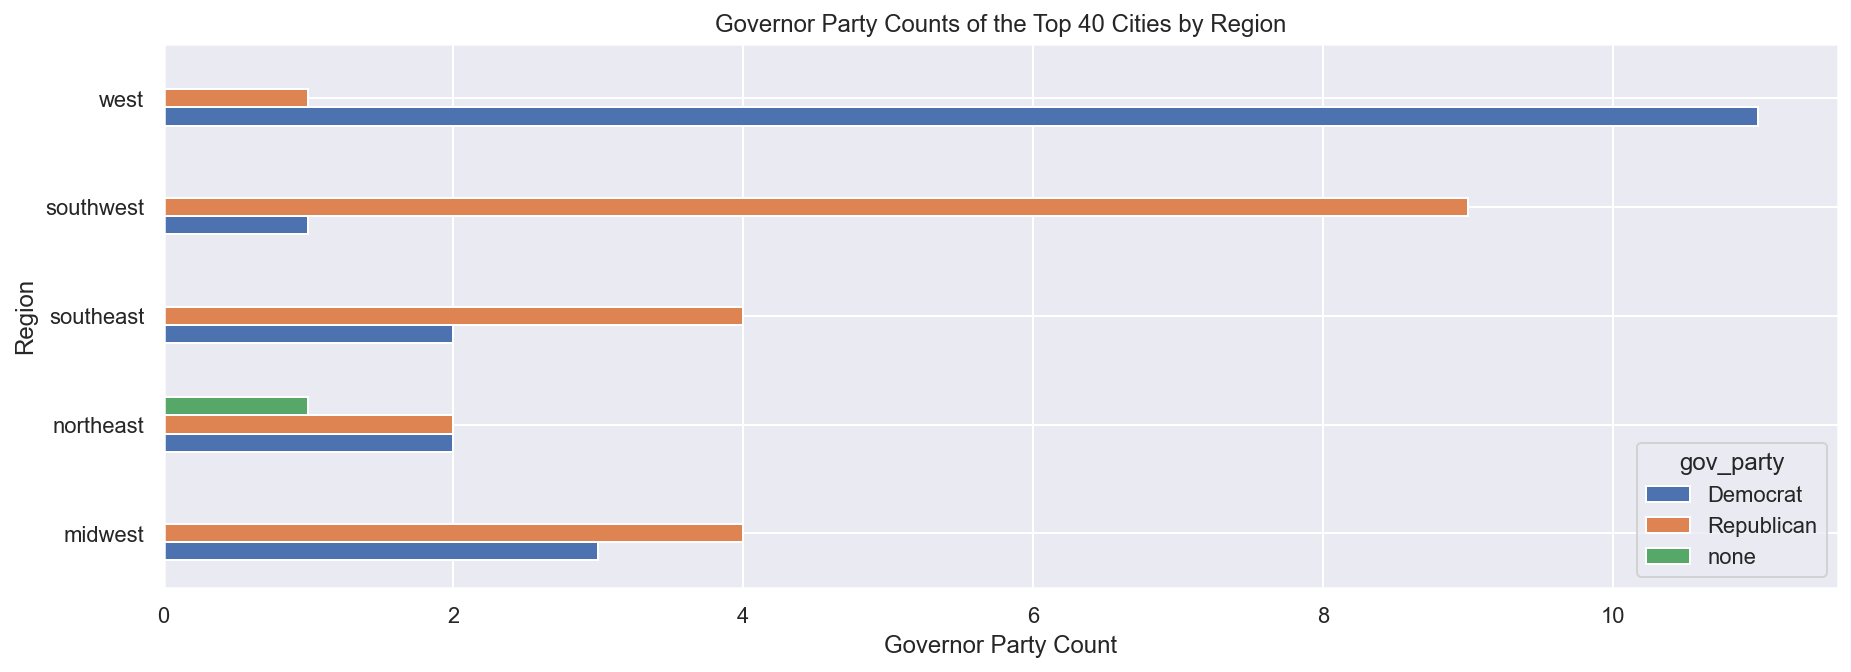

In [34]:
# Governor Party Counts of the Top 40 Cities by Region

gov_region_plot = top_df.groupby("region")["gov_party"].value_counts().unstack()
gov_region_plot.plot.barh(figsize = (15,5))
plt.xlabel("Governor Party Count")
plt.ylabel("Region")
plt.title("Governor Party Counts of the Top 40 Cities by Region");

# Congress Majority Party

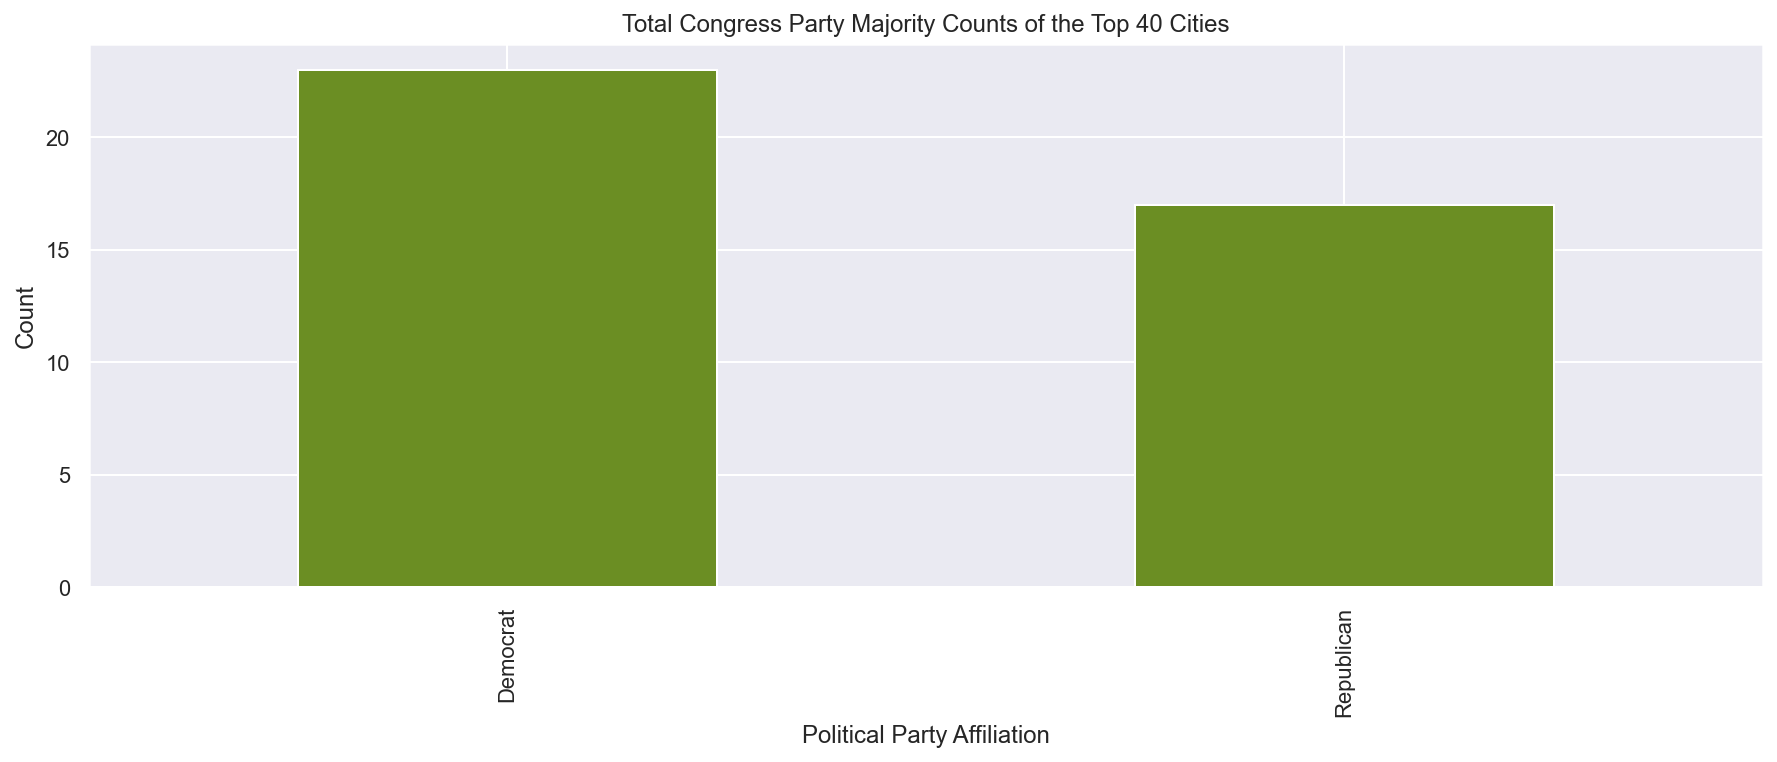

In [35]:
# Total Congress Party Majority Counts of the Top 40 Cities

cong_plot = top_df.groupby("cong_maj")["city"].count()
cong_plot.plot.bar(color = "olivedrab", figsize = (15,5))
plt.xlabel("Political Party Affiliation")
plt.ylabel("Count")
plt.title("Total Congress Party Majority Counts of the Top 40 Cities");

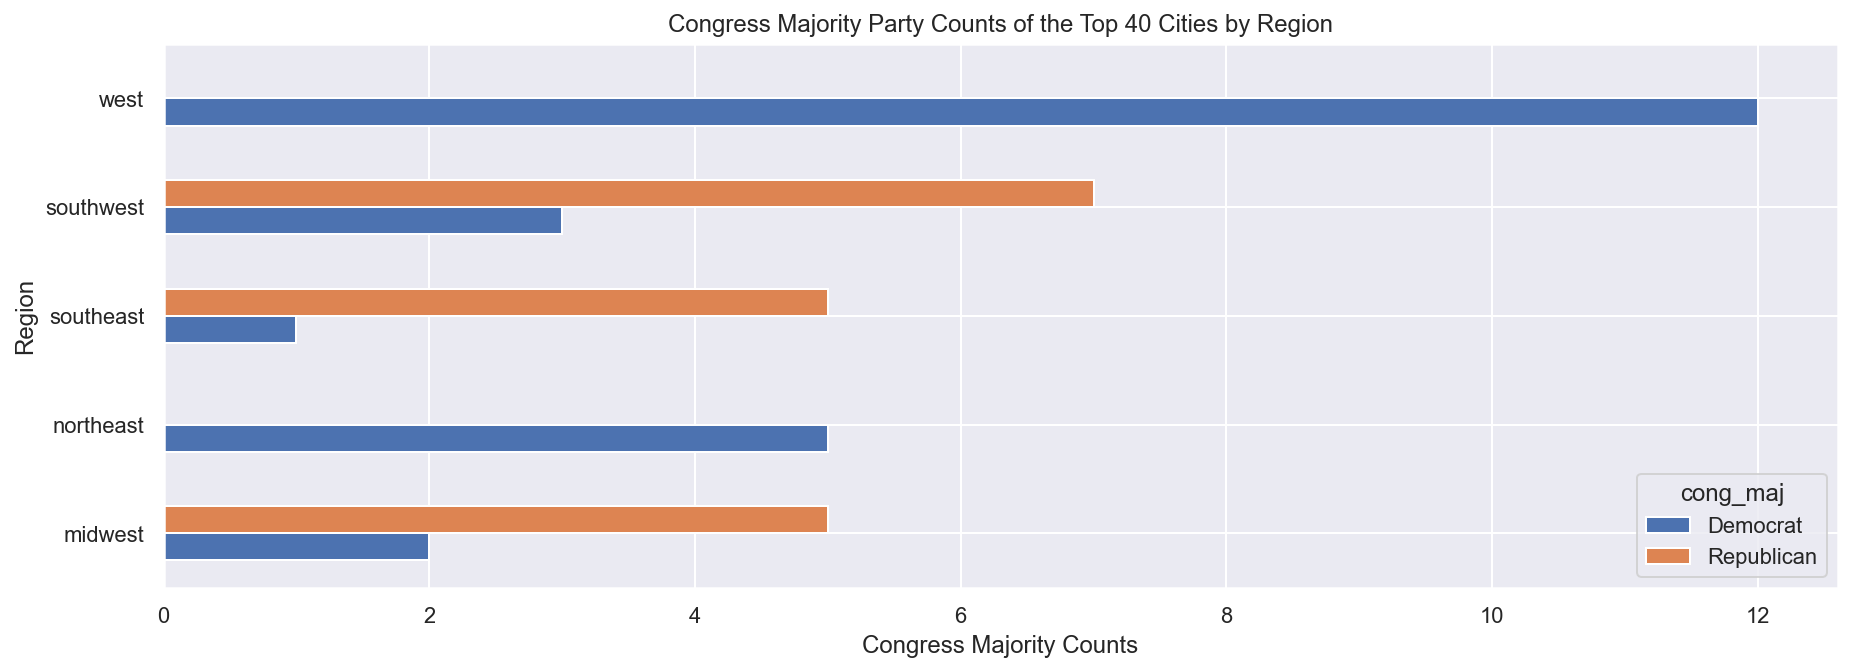

In [36]:
# Congress Majority Party Counts of the Top 40 Cities by Region

cong_region_plot = top_df.groupby("region")["cong_maj"].value_counts().unstack()
cong_region_plot.plot.barh(figsize = (15,5))
plt.xlabel("Congress Majority Counts")
plt.ylabel("Region")
plt.title("Congress Majority Party Counts of the Top 40 Cities by Region");

# Political Sums

To-Do:
- mayor_state = how frequently mayoral party and state majority party differs

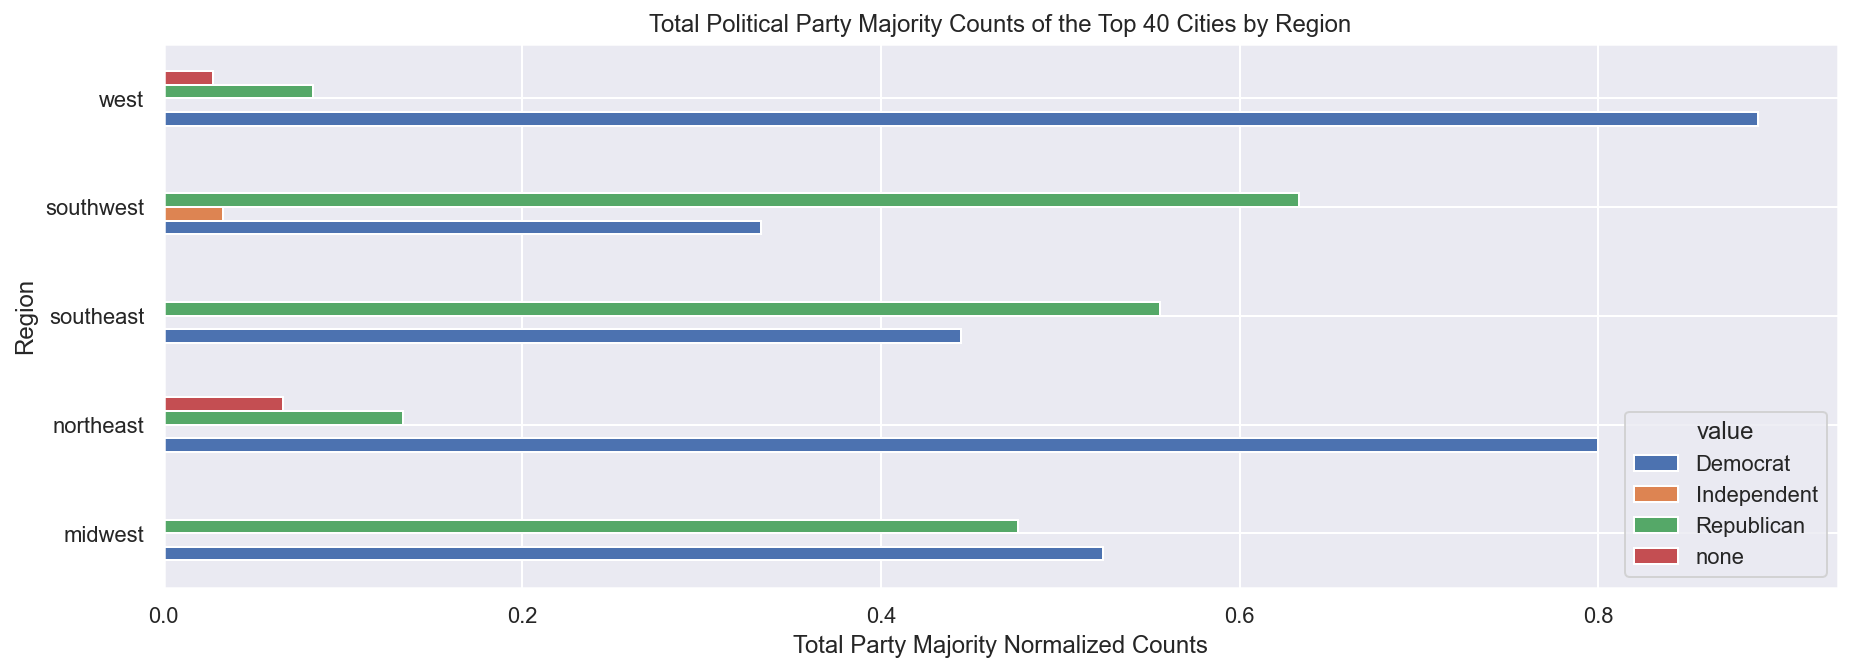

In [37]:
# Total Party Majority Counts of the Top 40 Cities by Region

political = top_df[["region", "city", "mayor_party", "gov_party", "cong_maj"]]
political = political.melt(id_vars = ["region","city"], value_vars = ["mayor_party", "gov_party", "cong_maj"])
political_gb = political.groupby("region")["value"].value_counts(normalize=True).unstack()
political_gb.plot.barh(figsize = (15,5))
plt.xlabel("Total Party Majority Normalized Counts")
plt.ylabel("Region")
plt.title("Total Political Party Majority Counts of the Top 40 Cities by Region");